# Introduction to DEA Landsat Surface Reflectance (Geoscience Australia Landsat Collection 3) <img align="right" src="https://github.com/GeoscienceAustralia/dea-notebooks/raw/develop/Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** [ga_ls8c_ard_3](https://explorer.sandbox.dea.ga.gov.au/ga_ls8c_ard_3)

## Background
The United States Geological Survey's (USGS) Landsat satellite program has been capturing images of the Australian continent for more than 30 years. These data are highly useful for land and coastal mapping studies.

In particular, the light reflected from the Earth’s surface (surface reflectance) is important for monitoring environmental resources (such as agricultural production and mining activities) over time.

We need to make accurate comparisons of imagery acquired at different times, seasons and geographic locations. However, inconsistencies can arise due to variations in atmospheric conditions, sun position, sensor view angle, surface slope and surface aspect. 
These inconsistencies need to be reduced or removed to ensure the data are consistent and can be compared over time.

### What this product offers
DEA's Landsat Surface Reflectance products take Landsat 5 Thematic Mapper (TM), Landsat 7 Enhanced Thematic Mapper Plus (ETM+) and Landsat 8 Operational Land Imager (OLI) imagery captured over the Australian continent and corrects for inconsistencies across land and coastal fringes. 
The result is accurate and standardised surface reflectance data, which is instrumental in identifying and quantifying environmental change.

DEA's Landsat Surface Reflectance products form a single, cohesive Analysis Ready Data (ARD) package, which allows you to analyse surface reflectance data as is without the need to apply additional corrections.

It contains three sub-products that provide corrections or attribution information:

* Surface Reflectance NBAR ([Landsat 5 TM](https://cmi.ga.gov.au/data-products/dea/367/dea-surface-reflectance-nbar-landsat-5-tm), [Landsat 7 ETM+](https://cmi.ga.gov.au/data-products/dea/476/dea-surface-reflectance-nbar-landsat-7-etm), [Landsat 8 OLI-TIRS](https://cmi.ga.gov.au/data-products/dea/402/dea-surface-reflectance-nbar-landsat-8-oli-tirs))
* Surface Reflectance NBART ([Landsat 5 TM](https://cmi.ga.gov.au/data-products/dea/477/dea-surface-reflectance-nbart-landsat-5-tm), [Landsat 7 ETM+](https://cmi.ga.gov.au/data-products/dea/399/dea-surface-reflectance-nbart-landsat-7-etm), [Landsat 8 OLI-TIRS](https://cmi.ga.gov.au/data-products/dea/400/dea-surface-reflectance-nbart-landsat-8-oli-tirs))
* Surface Reflectance Observation Attributes (OA) ([Landsat 5 TM](https://cmi.ga.gov.au/data-products/dea/369/dea-surface-reflectance-oa-landsat-5-tm), [Landsat 7 ETM+](https://cmi.ga.gov.au/data-products/dea/478/dea-surface-reflectance-oa-landsat-7-etm), [Landsat 8 OLI-TIRS](https://cmi.ga.gov.au/data-products/dea/404/dea-surface-reflectance-oa-landsat-8-oli-tirs))

The resolution is a 30 m grid based on the USGS Landsat Collection 1 archive.

### Applications
* The development of derivative products to monitor land, inland waterways and coastal features, such as:

   *  urban growth
   *  coastal habitats
   *  mining activities
   *  agricultural activity (e.g. pastoral, irrigated cropping, rain-fed cropping)
   *  water extent
   
* The development of refined information products, such as:

   *  areal units of detected surface water
   *  areal units of deforestation
   *  yield predictions of agricultural parcels
   
* Compliance surveys
* Emergency management

### Publications
* Li, F., Jupp, D. L. B., Reddy, S., Lymburner, L., Mueller, N., Tan, P., & Islam, A. (2010). An evaluation of the use of atmospheric and BRDF correction to standardize Landsat data. *IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing*, 3(3), 257–270. https://doi.org/10.1109/JSTARS.2010.2042281
* Li, F., Jupp, D. L. B., Thankappan, M., Lymburner, L., Mueller, N., Lewis, A., & Held, A. (2012). A physics-based atmospheric and BRDF correction for Landsat data over mountainous terrain. *Remote Sensing of Environment*, 124, 756–770. https://doi.org/10.1016/j.rse.2012.06.018

> **Note:** For more technical information about the DEA Landsat Surface Reflectance products, visit the official Geoscience Australia [DEA Landsat Surface Reflectance product listings](https://cmi.ga.gov.au/data-products?combine=&program%5Bdea%5D=dea&catalog%5B12884%5D=12884).

## Description

This notebook will demonstrate how to load data from the DEA Landsat Surface Reflectance products using the Digital Earth Australia datacube. 
Topics covered include:

1. Inspecting the Landsat products and measurements available in the datacube
2. Loading Landsat data for a specific location and time
3. Plotting Landsat data in true and false colour
4. Applying a cloud mask using the `oa_fmask` band
5. Advanced: Loading Landsat data in its native projection and resolution
6. Advanced: Filtering Landsat data by product metadata

***


## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import datacube
import matplotlib.pyplot as plt
from datacube.utils import masking 

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.datahandling import mostcommon_crs
from dea_tools.plotting import rgb

/env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


### Connect to the datacube

Connect to the datacube so we can access DEA data.

In [2]:
dc = datacube.Datacube(app='DEA_Landsat_Surface_Reflectance')

## Available products and measurements

### List products
We can use datacube's `list_products` functionality to inspect the DEA Landsat Surface Reflectance products that are available in the datacube.
The table below shows the product names that we will use to load the data, a brief description of the data, and the satellite instrument that acquired the data.


In [3]:
# List DEA Landsat Surface Reflectance products available in DEA
dc_products = dc.list_products()
dc_products.loc[['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3']]

,name,description,license,default_crs,default_resolution
name,,,,,
ga_ls5t_ard_3,ga_ls5t_ard_3,Geoscience Australia Landsat 5 Thematic Mapper...,CC-BY-4.0,None,None
ga_ls7e_ard_3,ga_ls7e_ard_3,Geoscience Australia Landsat 7 Enhanced Themat...,CC-BY-4.0,None,None
ga_ls8c_ard_3,ga_ls8c_ard_3,Geoscience Australia Landsat 8 Operational Lan...,CC-BY-4.0,None,None


### List measurements
We can further inspect the data available for each DEA Landsat Surface Reflectance product using datacube's `list_measurements` functionality.
The table below lists each of the measurements available in the data which have prefixes `nbart_`, `nbar_` and `oa_` that represent three main "sub-products" that provide corrections or attribution information for each Landsat product.

In [4]:
dc_measurements = dc.list_measurements()
dc_measurements.loc[['ga_ls8c_ard_3']]

name    dtype  \
product       measurement                                                       
ga_ls8c_ard_3 nbart_coastal_aerosol            nbart_coastal_aerosol    int16   
              nbart_blue                                  nbart_blue    int16   
              nbart_green                                nbart_green    int16   
              nbart_red                                    nbart_red    int16   
              nbart_nir                                    nbart_nir    int16   
              nbart_swir_1                              nbart_swir_1    int16   
              nbart_swir_2                              nbart_swir_2    int16   
              nbart_panchromatic                  nbart_panchromatic    int16   
              oa_fmask                                      oa_fmask    uint8   
              oa_nbart_contiguity                oa_nbart_contiguity    uint8   
              oa_azimuthal_exiting              oa_azimuthal_exiting  float32   
              oa_azimuthal_incident            oa_azimuthal_incident  float32   
              oa_combined_terrain_shadow  oa_combined_terrain_shadow    uint8   
              oa_exiting_angle                      oa_exiting_angle  float32   
              oa_incident_angle                    oa_incident_angle  float32   
              oa_relative_azimuth                oa_relative_azimuth  float32   
              oa_relative_slope                    oa_relative_slope  float32   
              oa_satellite_azimuth              oa_satellite_azimuth  float32   
              oa_satellite_view                    oa_satellite_view  float32   
              oa_solar_azimuth                      oa_solar_azimuth  float32   
              oa_solar_zenith                        oa_solar_zenith  float32   
              oa_time_delta                            oa_time_delta  float32   

                                         units nodata  \
product       measurement                               
ga_ls8c_ard_3 nbart_coastal_aerosol          1   -999   
              nbart_blue                     1   -999   
              nbart_green                    1   -999   
              nbart_red                      1   -999   
              nbart_nir                      1   -999   
              nbart_swir_1                   1   -999   
              nbart_swir_2                   1   -999   
              nbart_panchromatic             1   -999   
              oa_fmask                       1      0   
              oa_nbart_contiguity            1    255   
              oa_azimuthal_exiting           1    NaN   
              oa_azimuthal_incident          1    NaN   
              oa_combined_terrain_shadow     1    255   
              oa_exiting_angle               1    NaN   
              oa_incident_angle              1    NaN   
              oa_relative_azimuth            1    NaN   
              oa_relative_slope              1    NaN   
              oa_satellite_azimuth           1    NaN   
              oa_satellite_view              1    NaN   
              oa_solar_azimuth               1    NaN   
              oa_solar_zenith                1    NaN   
              oa_time_delta                  1    NaN   

                                                                  aliases  \
product       measurement                                                   
ga_ls8c_ard_3 nbart_coastal_aerosol       [nbart_band01, coastal_aerosol]   
              nbart_blue                             [nbart_band02, blue]   
              nbart_green                           [nbart_band03, green]   
              nbart_red                               [nbart_band04, red]   
              nbart_nir                               [nbart_band05, nir]   
              nbart_swir_1                  [nbart_band06, swir_1, swir1]   
              nbart_swir_2                  [nbart_band07, swir_2, swir2]   
              nbart_panchromatic             [nbart_band0

#### Surface Reflectance NBAR
Radiance data collected by Landsat 8 OLI-TIRS sensors can be affected by atmospheric conditions, sun position, sensor view angle, surface slope and surface aspect. 
These need to be reduced or removed to ensure the data can be compared consistently over time and space to identify and quantify environmental change.
NBAR data (i.e. measurements with the `nbar_` prefix above) takes Landsat imagery captured over the Australian continent and corrects the inconsistencies across land and coastal fringes using Nadir corrected Bi-directional reflectance distribution function Adjusted Reflectance (NBAR).

> **Note:** NBAR data is currently only available in the NCI environment, not the DEA Sandbox.

#### Surface Reflectance NBART (with terrain illumination correction)
NBART data (i.e. measurements with the `nbart_` prefix above) are also processed using NBAR, but have an additional terrain illumination correction applied using a Digital Surface Model (DSM) to correct for varying terrain (see Figure 1).
NBART is typically the default choice for most analyses as removing terrain illumination and shadows allows changes in the landscape to be compared more consistently across time. 

![Comparison between NBAR and NBART](../Supplementary_data/02_DEA/nbar_nbart_animation.gif)

> **Figure 1:** The animation above demonstrates how the NBART correction results in a significantly more two-dimensional looking image that is less affected by terrain illumination and shadow.
Black pixels in the NBART image represent areas of deep terrain shadow that can't be corrected as they're determined not to be viewable by either the sun or the satellite. 
These are represented by -999 `nodata` values in the data.
For more details about the difference between NBAR and NBART data, refer to the [Introduction to Digital Earth Australia](../Beginners_guide/02_DEA.ipynb) notebook, and the official [DEA Landsat Surface Reflectance product listings](https://cmi.ga.gov.au/data-products?combine=&program%5Bdea%5D=dea&catalog%5B12884%5D=12884).

#### Surface Reflectance Observation Attributes (OA)
The surface reflectance data produced by NBAR and NBART require accurate and reliable data provenance and information about the satellite data's origins, derivations, methodology and processes. 
This allows the data to be reproducible and can increase the reliability of derivative applications.
Attribution labels such as the location of cloud and cloud shadow pixels can be used to mask out these particular features from the surface reflectance analysis, or used as training data for machine learning algorithms. 
DEA's Landsat surface reflectance data provides this information as "Observation Attribute" measurements with the prefix `oa_`.
In the following [Cloud masking](#Cloud-masking) section, we will demonstrate how to use OA data to create clear, cloud-free Landsat imagery.

The table produced by `.list_measurements()` also contains important information about the data type, nodata values and aliases available for each measurement contained in the product.
Aliases (e.g. `blue`) can be used instead of the official measurement name (e.g. `nbart_blue`) when loading data (see next step).

## Loading data
Now that we know what products and measurements are available for the products, we can load data from the datacube using `dc.load`.

In the example below, we will load data from Landsat 8 for Canberra from August 2018.
We will load data from six spectral satellite bands, as well as cloud masking data (`'oa_fmask'`).
By specifying `output_crs='EPSG:3577'` and `resolution=(-30, 30)`, we request that datacube reproject our data to the Australian Albers coordinate reference system (CRS), with 30 x 30 m pixels.
Finally, `group_by='solar_day'` ensures that overlapping images taken within seconds of each other as the satellite passes over are combined into a single time step in the data.

> **Note:** For a more general discussion of how to load data using the datacube, refer to the [Introduction to loading data](../Beginners_guide/04_Loading_data.ipynb) notebook.



In [5]:
ls8_ds = dc.load(product='ga_ls8c_ard_3',
                 measurements=[
                     'nbart_red', 'nbart_green', 'nbart_blue', 'nbart_nir',
                     'nbart_swir_1', 'nbart_swir_2', 'oa_fmask'
                 ],
                 x=(149.05, 149.17),
                 y=(-35.25, -35.32),
                 time=('2018-08-06', '2018-08-06'),
                 output_crs='EPSG:3577',
                 resolution=(-30, 30),
                 group_by='solar_day')

We can now view the data that we loaded.
The satellite bands listed under `Data variables` should match the measurements we requested above.

In [6]:
ls8_ds

<xarray.Dataset>
Dimensions:       (time: 1, x: 395, y: 307)
Coordinates:
  * time          (time) datetime64[ns] 2018-08-06T23:49:39.234612
  * y             (y) float64 -3.953e+06 -3.953e+06 ... -3.962e+06 -3.962e+06
  * x             (x) float64 1.543e+06 1.543e+06 ... 1.555e+06 1.555e+06
    spatial_ref   int32 3577
Data variables:
    nbart_red     (time, y, x) int16 694 704 621 654 745 ... 206 201 182 168 177
    nbart_green   (time, y, x) int16 679 643 576 577 638 ... 269 264 284 288 297
    nbart_blue    (time, y, x) int16 663 639 545 541 630 ... 239 224 240 248 258
    nbart_nir     (time, y, x) int16 1490 1447 1461 1535 1628 ... 17 58 88 320
    nbart_swir_1  (time, y, x) int16 1072 1071 1055 1112 1243 ... 24 1 45 63 169
    nbart_swir_2  (time, y, x) int16 815 789 706 712 805 857 ... 60 59 31 24 62
    oa_fmask      (time, y, x) uint8 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 5 5 5 5 5 5 5
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

## Plotting Landsat data
We can plot the data we loaded using the `rgb` function.
By default, the function will plot data as a true colour image using the `'nbart_red', 'nbart_green', 'nbart_blue'` bands.

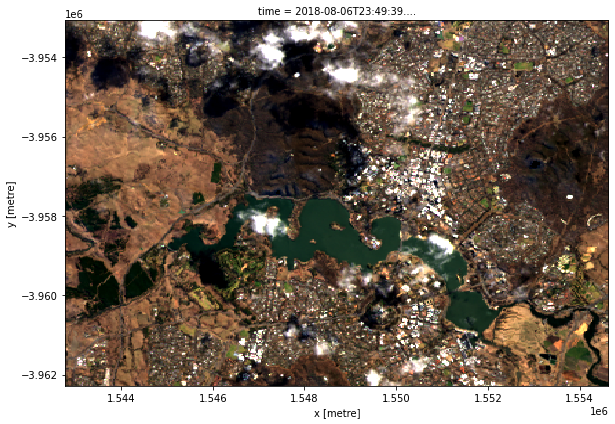

In [7]:
rgb(ls8_ds, col='time')

By plotting the `['nbart_swir_1', 'nbart_nir', 'nbart_green']` bands, we can view the imagery in false colour.
This view emphasises growing vegetation in green and water in deep blue or black.

> **Note:** For more information about plotting satellite imagery in true and false colour, refer to the [Introduction to Plotting notebook](../Beginners_guide/05_Plotting.ipynb).

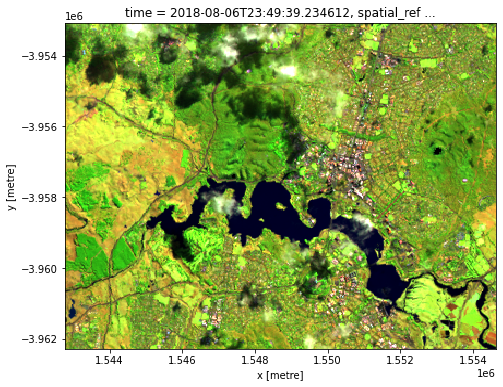

In [8]:
rgb(ls8_ds, bands=['nbart_swir_1', 'nbart_nir', 'nbart_green'])

## Cloud masking
Many analyses might want to exclude targets that are obscured by cloud or cloud shadow.
DEA Landsat Surface Reflectance data contains information about whether each pixel is likely to be free of clouds or shadow using an OA measurement band called `oa_fmask`.
This band is calculated using the [Fmask (Function of Mask) algorithm](https://www.sciencedirect.com/science/article/abs/pii/S0034425711003853) that classifies pixels using the following mutually exclusive numerical flags:

In [9]:
# Display available oa_fmask flags
masking.describe_variable_flags(ls8_ds.oa_fmask)['values'][0]

{'0': 'nodata',
 '1': 'valid',
 '2': 'cloud',
 '3': 'shadow',
 '4': 'snow',
 '5': 'water'}

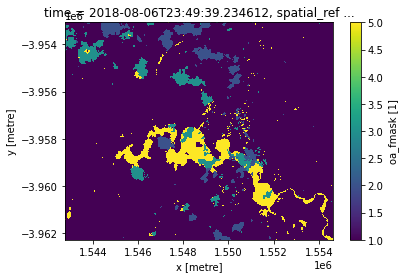

In [10]:
ls8_ds.oa_fmask.plot()

Of the six `oa_fmask` flags, `1` (clear), `4` (snow) and `5` (water) represent clear pixels that are not obscured by either cloud or cloud shadow. 
We can use these to create a mask that can be applied to other Landsat data to remove clouds or shadows before the data is analysed.

> **Note:** Fmask's "water" mask should typically not be relied to accurately analyse water using satellite data.
Instead, consider loading data from the [DEA Water Observations product](DEA_Water_Observations.ipynb) instead.

In [11]:
# Identify pixels that are either "valid", "water" or "snow"
cloud_free_mask = (masking.make_mask(ls8_ds.oa_fmask, fmask="valid") |
                   masking.make_mask(ls8_ds.oa_fmask, fmask="water") |
                   masking.make_mask(ls8_ds.oa_fmask, fmask="snow"))

# Apply the mask
ls8_masked = ls8_ds.where(cloud_free_mask)

If we plot our masked data, we can see that the areas of cloud and cloud shadow above have now been masked out (i.e. area of `NaN` values or white pixels):

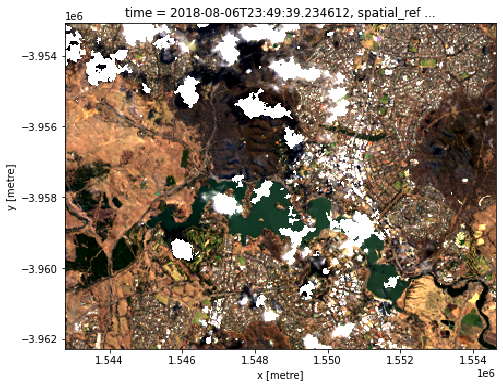

In [12]:
rgb(ls8_masked)

### Limitations of Fmask for cloud masking Landsat data

Fmask has limitations due to the complex nature of detecting natural phenomena such as cloud. 
For example, bright targets such as beaches, buildings and salt lakes often get mistaken for clouds. 
Edges and fringes of clouds also tend to be more transparent and can be missed by the cloud detection algorithm.

Because of these limitations, it can be advisable to treat individual FMask classifications with caution, and use analysis techniques that are robust to any potential classification errors (e.g. [temporal median](../Frequently_used_code/Generating_composites.ipynb) or [geomedian composites](../Frequently_used_code/Generating_geomedian_composites.ipynb) that will supress the effect of false positive or negative cloud classifications).

> **Note:** For more information about Fmask and other Surface Reflectance Observation Attributes, refer to the [Observation Attributes product description listings](https://cmi.ga.gov.au/data-products/dea/404/dea-surface-reflectance-oa-landsat-8-oli-tirs) for Landsat 5, 7 and 8.
> For a more detailed guide to masking satellite data (and dealing with common issues such as false positive cloud detection, refer to the [Masking data](../Frequently_used_code/Masking_data.ipynb) notebook. 

## Advanced

### Native load
DEA Landsat Surface Reflectance data is originally processed from USGS Collection 1 data which is stored on file in different Universal Transverse Mercator (UTM) CRSs depending on the longitude of the data.
There are 8 UTM zones (and therefore unique Landsat CRSs) that cover Australia:

![UTM zones](../Supplementary_data/DEA_Landsat_Surface_Reflectance/utm_zones.jpg)

Reprojecting these data into a single projection system like Australian Albers (`EPSG:3577`) will force datacube to resample the data to fit this new spatial grid. 
This can lead to artefacts in the resulting imagery that can affect its usefulness for precise applications (e.g. using Landsat to accurately map the boundary between land and water [using sub-pixel techniques](https://www.mdpi.com/2072-4292/11/24/2984)).

#### Determining native projection and spatial resolution

Because of this, it can be useful to load Landsat data in its **"native"** projection and spatial resolution &mdash; that is, load the data into the same spatial grid as it is stored on file without applying any reprojection or resampling.
To achieve this, we need to first determine which of the UTM zones above apply for a given location, and use this information to load our data into that CRS. 
We can do this using DEA's `mostcommon_crs` function which takes a datacube query, then identifies the most common CRS for all data that matches the query without having to load this data into memory first.

First, we will set up a query covering the same time and location previously used to load data:


In [13]:
query = {
    'x': (149.05, 149.17),
    'y': (-35.25, -35.32),
    'time': ('2018-08-06', '2018-08-06')
}

We can now pass this to `mostcommon_crs`. 
In this example, the most common CRS is `'epsg:32655'` or UTM Zone 55 (this matches the map above).

In [14]:
# Determine the most common CRS for the query
native_crs = mostcommon_crs(dc, product='ga_ls8c_ard_3', query=query)
native_crs

'epsg:32655'

We can now pass this CRS to `dc.load()`'s `output_crs` parameter to load Landsat data in its native spatial grid.
The native resolution of all DEA Landsat Surface Reflectance data (with the exception of Landsat 8's panchromatic band; see the [Pansharpening notebook](../Frequently_used_code/Pan_sharpening_Brovey.ipynb)) is 30 m, so we can supply this to `resolution` directly without having to obtain it from the data.

#### Using the align parameter when natively loading data

In addition to `output_crs` and `resolution`, one final parameter is required to construct the spatial grid used for natively loading Landsat data: `align`.
By default, datacube assumes that pixel edges are aligned such that x=0 and y=0 lines fall on pixel edges. 
However, Landsat data is stored on file with coordinates that define the centre - not the edge - of each pixel.
When natively loading data, to ensure the spatial pixel grid created by datacube is exactly the same grid as used by Landsat imagery, we need to shift this grid by 15 m in both directions by specifying `align=(15, 15)`.
Otherwise, natively loaded pixels will be offset by half a pixel from their true location.

To determine whether you need to use `align` when loading DEA Landsat Surface Reflectance data, all the following must apply:

* You are loading Landsat data from the `ga_ls5t_ard_3`, `ga_ls7e_ard_3` and `ga_ls8c_ard_3` products that define pixel coordinates by their centers rather than pixel edges
* You want to load data in its native projection without a half pixel offset
* You are supplying a native UTM zone CRS generated by `mostcommon_crs` or copied from a datacube dataset
* You are supplying a native resolution (e.g. `resolution=(-30, 30)`)

> **Note:** You should also use the `align` parameter when natively loading data from the [DEA Water Observations](DEA_Water_Observations.ipynb) and [DEA Fractional Cover](DEA_Fractional_Cover.ipynb) products. 

In [15]:
# Load Landsat using native CRS, resolution and appropriate alignment
ls8_native = dc.load(product='ga_ls8c_ard_3',
                     measurements=['nbart_red', 'nbart_green', 'nbart_blue'],
                     output_crs=native_crs,
                     resolution=(-30, 30),
                     align=(15, 15),
                     group_by='solar_day',
                     **query)

> **Note:** If a study area extends across the boundary of two UTM zones, it is possible that a single datacube query will return data with multiple CRSs.
In this scenario, although `mostcommon_crs` will return the native CRS that will involve the least overall reprojection or resampling, some data will unavoidably need to be reprojected and resampled away from its native CRS and resolution. 
If this is the case, `mostcommon_crs` will print a warning to inform you that multiple CRSs were encounted for the query. 
To minimise the impacts of this reprojection, you can specify a `resampling` method that will only be used to transform the subset of satellite observations that do not match the CRS generated by `mostcommon_crs` (for more information about resampling, refer to the [dc.load documentation](https://datacube-core.readthedocs.io/en/latest/dev/api/generate/datacube.Datacube.load.html#datacube.Datacube.load)). 


### Filtering by metadata
In addition to generic `dc.load` query parameters (e.g. `product`, `measurements`, `time`, `x`, `y` etc), DEA Landsat Surface Reflectance data contains a set of extra metadata fields that can be queried to filter data before it is loaded.
Searchable metadata fields for a product can be listed using the code below:

In [16]:
dataset = dc.find_datasets(product='ga_ls8c_ard_3', limit=1)[0]
dir(dataset.metadata)

['cloud_cover',
 'creation_dt',
 'creation_time',
 'crs_raw',
 'dataset_maturity',
 'eo_gsd',
 'eo_sun_azimuth',
 'eo_sun_elevation',
 'fmask_clear',
 'fmask_cloud_shadow',
 'fmask_snow',
 'fmask_water',
 'format',
 'gqa',
 'gqa_abs_iterative_mean_x',
 'gqa_abs_iterative_mean_xy',
 'gqa_abs_iterative_mean_y',
 'gqa_abs_x',
 'gqa_abs_xy',
 'gqa_abs_y',
 'gqa_cep90',
 'gqa_iterative_mean_x',
 'gqa_iterative_mean_xy',
 'gqa_iterative_mean_y',
 'gqa_iterative_stddev_x',
 'gqa_iterative_stddev_xy',
 'gqa_iterative_stddev_y',
 'gqa_mean_x',
 'gqa_mean_xy',
 'gqa_mean_y',
 'gqa_stddev_x',
 'gqa_stddev_xy',
 'gqa_stddev_y',
 'grid_spatial',
 'id',
 'instrument',
 'label',
 'landsat_scene_id',
 'lat',
 'lon',
 'measurements',
 'platform',
 'product_family',
 'region_code',
 'sources',
 'time']

Some of the most useful metadata fields for filtering Landsat data before loading it include:

* `gqa_iterative_mean_xy`: An estimate of how accurately a satellite scene is georeferenced, calculated by comparing hundreds of candidate points against a reference image, then discarding outliers to obtain a more robust estimate.
Values are given in pixel units, where a value of less than 1 indicates that satellite pixels are georeferenced to within a single pixel of their true location.
This parameter can be used to ensure that all loaded data is aligned spatially through time. 
For example, to load only imagery with a geometric accuracy of less than 0.5 of a pixel (e.g. 15 m), we can add `gqa_iterative_mean_xy=(0, 0.5)` to our `dc.load` query:

In [17]:
ls8_geo = dc.load(product='ga_ls8c_ard_3',
                  measurements=['nbart_red', 'nbart_green', 'nbart_blue'],
                  x=(149.05, 149.17),
                  y=(-35.25, -35.32),
                  time=('2018-01-01', '2018-03-01'),
                  gqa_iterative_mean_xy=(0, 0.5),
                  output_crs='EPSG:3577',
                  resolution=(-30, 30),
                  group_by='solar_day')

* `cloud_cover`: This gives an estimate of the percentage (i.e. from 0 to 100) of each satellite scene that contains cloud (as measured by Fmask).

For example, to filter imagery to data from scenes with between 0 and 10% cloud, we can add `cloud_cover=(0, 10)` to our `dc.load` query:


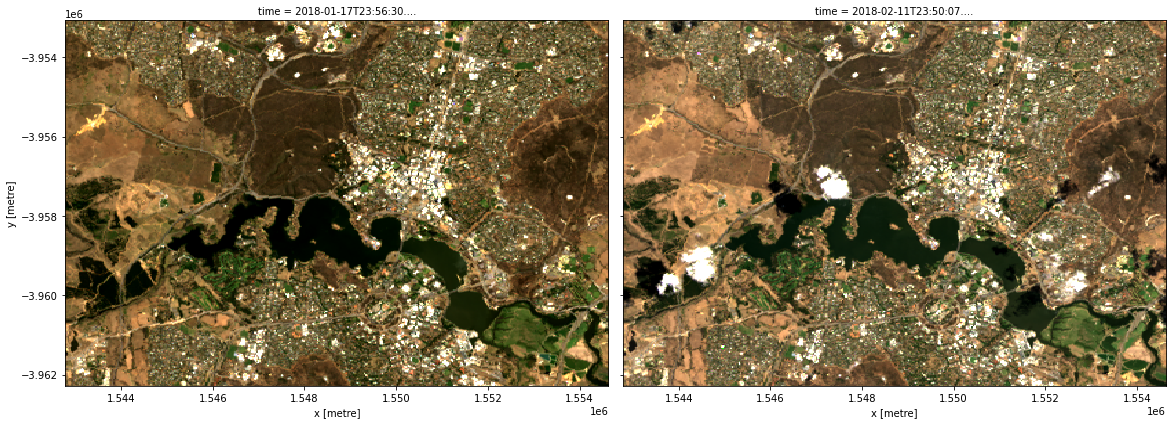

In [18]:
ls8_nocloud = dc.load(product='ga_ls8c_ard_3',
                      measurements=['nbart_red', 'nbart_green', 'nbart_blue'],
                      x=(149.05, 149.17),
                      y=(-35.25, -35.32),
                      time=('2018-01-01', '2018-03-01'),
                      cloud_cover=(0, 10),
                      output_crs='EPSG:3577',
                      resolution=(-30, 30),
                      group_by='solar_day')

# Plot imagery to verify they are mostly cloud-free
rgb(ls8_nocloud, col='time')

> **Note:** Metadata provides a single value for each *entire* Landsat satellite scene, not the specific location specified by `dc.load`.
For example, `cloud_cover` provides an estimate of cloudiness for each full Landsat scene that intersects with your query, which may not reflect the cloudiness of the smaller sub-region you have requested using `x` and `y`.
For a more accurate method for filtering satellite data by the cloudiness of a specific study area, refer to the [Filtering to non-cloudy observations section of the Using load_ard](../Frequently_used_code/Using_load_ard.ipynb#Filtering-to-non-cloudy-observations) notebook.

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** September 2021

**Compatible datacube version:** 

In [19]:
print(datacube.__version__)

1.8.5


## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)